Setup

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

Creating size of dataset

In [22]:
import os
import cv2
import numpy as np

# Define the paths to the directories containing images
holes_dir = 'training/holes/'
stickers_dir = 'training/stickers/'
holes_test = "testing/holes/"
stickers_test = "testing/stickers/"

# Define lists to store the images and labels
x_train = []
y_train = []
x_test = []
y_test = []

# Function to load images from a directory and assign labels
def load_images_from_dir(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # Resize the images as necessary
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            x_train.append(img)
            y_train.append(label)

def load_images_from_dir_test(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # Resize the images as necessary
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            x_test.append(img)
            y_test.append(label)

# Load images from the 'holes' directory with label 0
load_images_from_dir(holes_dir, 0)

# Load images from the 'stickers' directory with label 1
load_images_from_dir(stickers_dir, 1)

load_images_from_dir_test(holes_test, 0)
load_images_from_dir_test(stickers_test, 1)


# Convert lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Verify the shape of the arrays
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)




x_train_length, x_train_rows, x_train_columns = x_train.shape
x_test_length, x_test_rows, x_test_colums = x_test.shape
y_train_length = y_train.shape[0] # label datasets are a vector so index 2 and 3 do not exist
y_test_length = y_test.shape[0]

print(f'The training image set (x_train) contains {x_train_length} images that are {x_train_columns} x {x_train_rows} pixels')
print(f'The training label set (y_train) contains {y_train_length} labels')
print(f'The test image set (x_test) contains {x_test_length} images that are {x_train_columns} x {x_train_rows} pixels')
print(f'The test label set (y_test) contains {y_test_length} labels')

Shape of x_train: (6916, 64, 64)
Shape of y_train: (6916,)
The training image set (x_train) contains 6916 images that are 64 x 64 pixels
The training label set (y_train) contains 6916 labels
The test image set (x_test) contains 768 images that are 64 x 64 pixels
The test label set (y_test) contains 768 labels


Visualize Samples

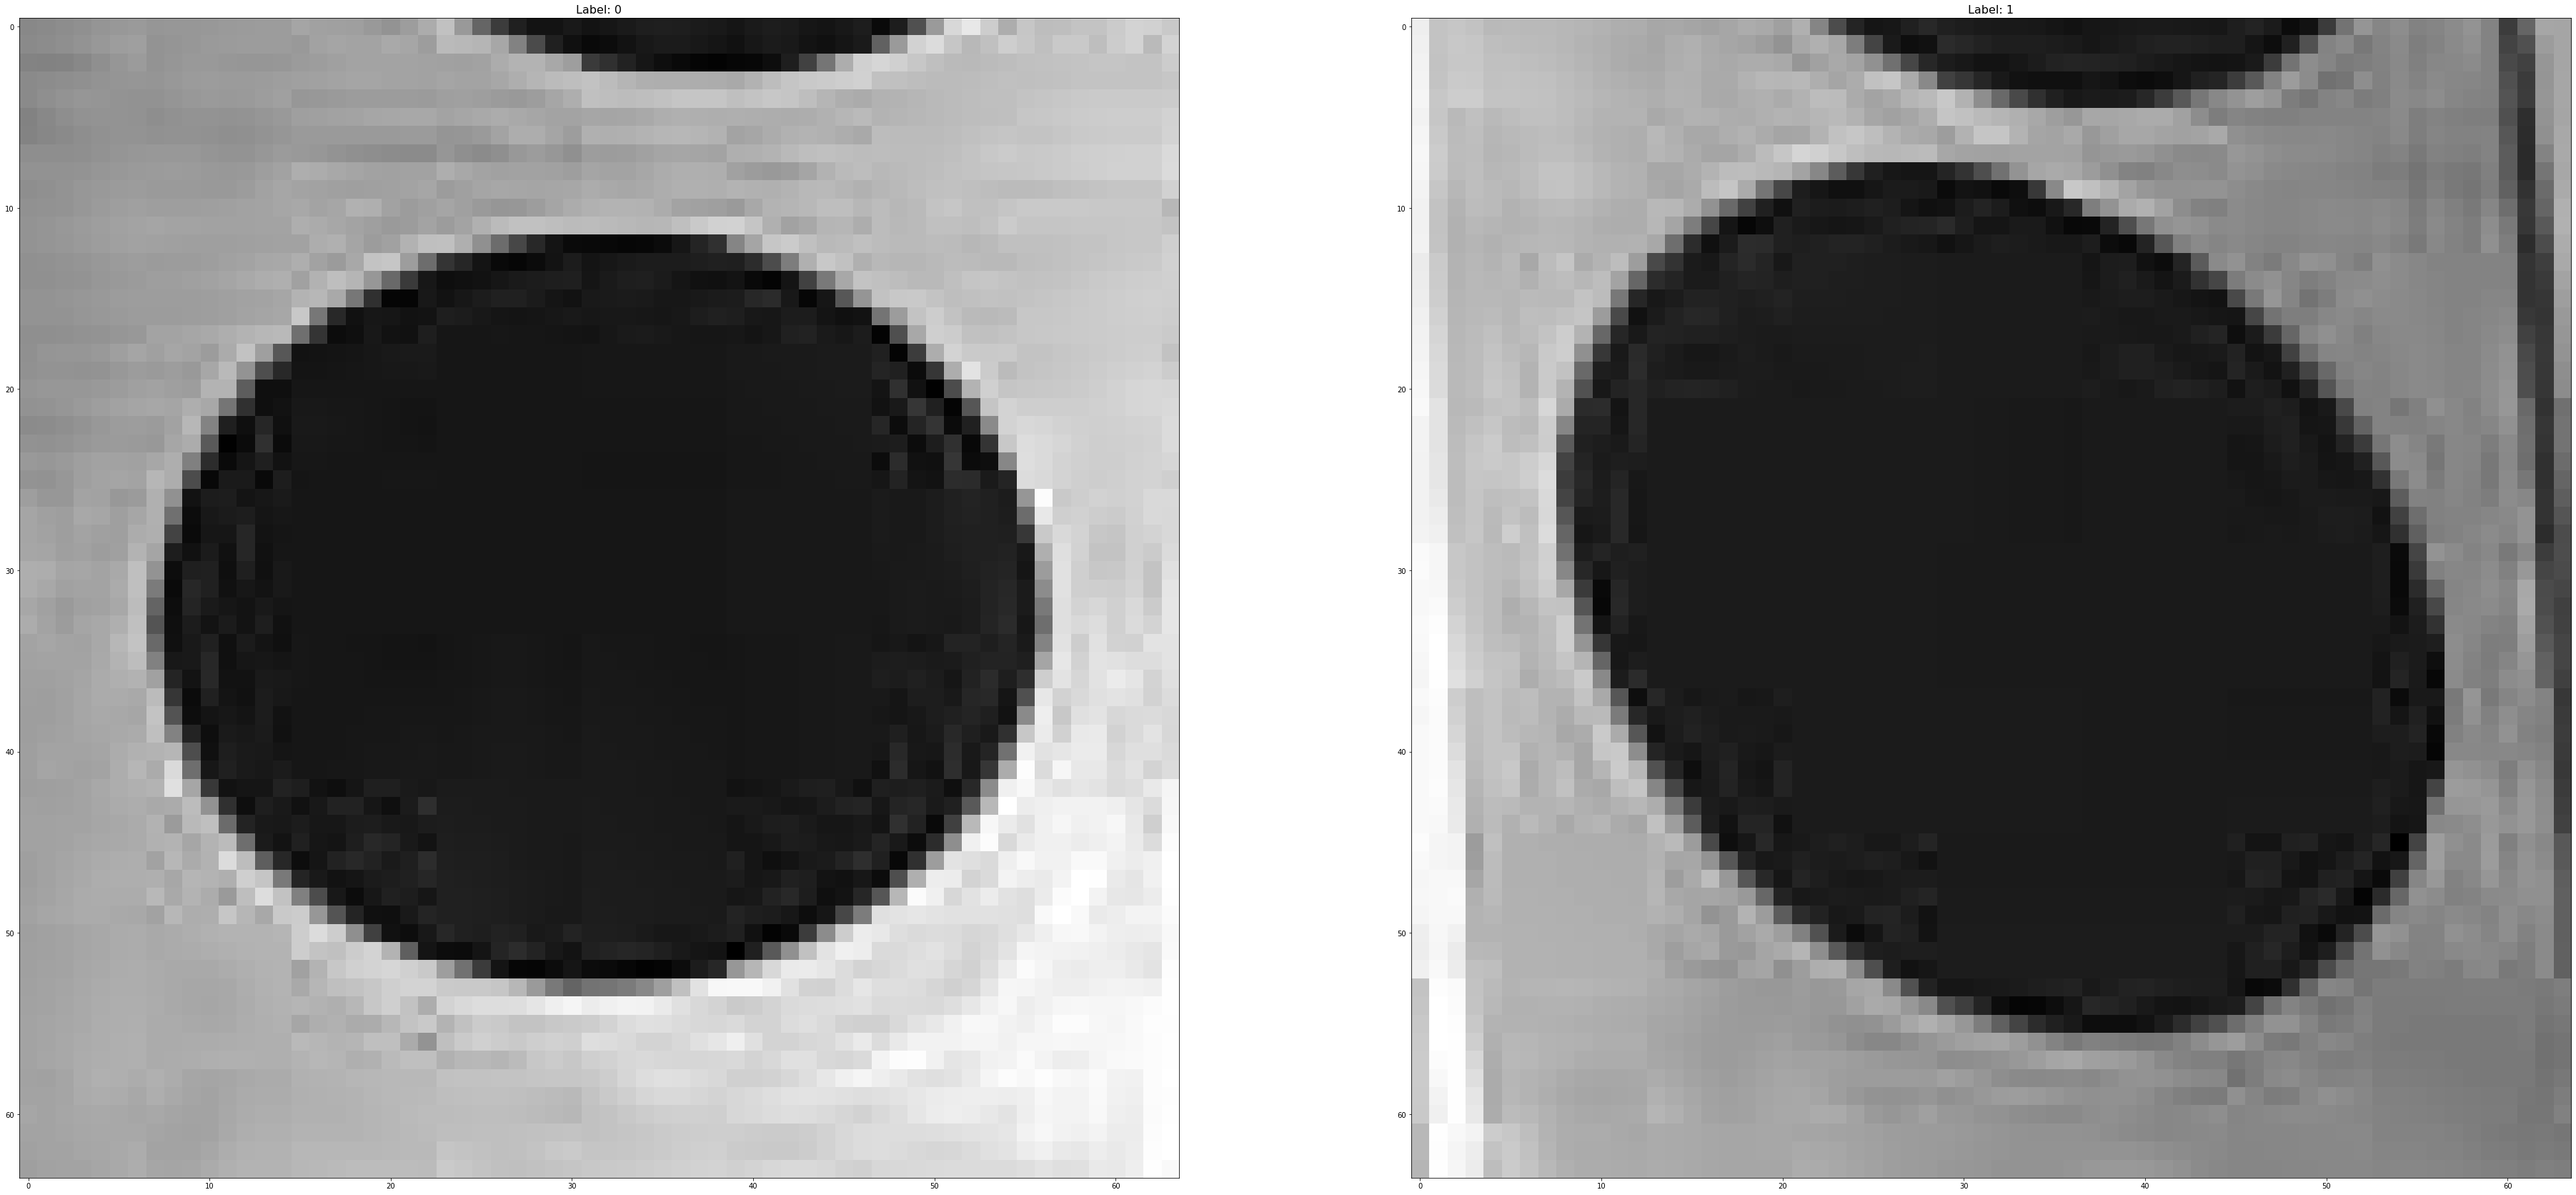

In [23]:
num_classes = 2
f, ax = plt.subplots(1, num_classes, figsize=(64,64))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

Label Conversion (to 2d array to see what ai thinks is circle or sticker)

In [24]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes) # convert training labels
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes) # convert test labels
for i in range(10): # print a small sample of labels
  print(y_train[i])

[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]


Reshaping img pixel matrices to vectors

In [25]:
# Normalize Data (shrinks our data range to 0 to 1) **I THINK FLOOR DIVISION NEEDED HERE CONFIRM WITH EIDAN**
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape Data (takes a 64 x 64 matrix and flattens it into 1 row which is basically a very long vector)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x_train_length = x_train.shape[0]
x_train_vector_length = x_train.shape[1]
print(f'The training image set (x_train) contains {x_train_length} vectors that are {x_train_vector_length} long')

The training image set (x_train) contains 6916 vectors that are 4096 long


Creating Neural Network

In [26]:
model = Sequential()

model.add(Dense(units=128, input_shape=(4096,), activation='relu')) # add the input layer -- changed 784 (28*28) to 4096 (64*64) -- may need to increase dense units ASK EIDAN
model.add(Dense(units=128, activation='relu')) # add a hidden layer -- may need to increase dense units ASK EIDAN
model.add(Dropout(0.25)) # randomly deactivates 25% of neurons during training to help prevent overfitting
model.add(Dense(units=2, activation='softmax')) # add the output layer, assigns a probability to each possible output

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() # prints info about the model you just created

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               524416    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 541,186
Trainable params: 541,186
Non-trainable params: 0
_________________________________________________________________


Training Model

In [27]:
batch_size = 512
epochs=50
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
14/14 [==============================] - 1s 17ms/step - loss: 0.8367 - accuracy: 0.5324
Epoch 2/10
14/14 [==============================] - 0s 14ms/step - loss: 0.6516 - accuracy: 0.6258
Epoch 3/10
14/14 [==============================] - 0s 14ms/step - loss: 0.5882 - accuracy: 0.6807
Epoch 4/10
14/14 [==============================] - 0s 14ms/step - loss: 0.5389 - accuracy: 0.7196
Epoch 5/10
14/14 [==============================] - 0s 13ms/step - loss: 0.5048 - accuracy: 0.7390
Epoch 6/10
14/14 [==============================] - 0s 14ms/step - loss: 0.4746 - accuracy: 0.7558
Epoch 7/10
14/14 [==============================] - 0s 13ms/step - loss: 0.4628 - accuracy: 0.7676
Epoch 8/10
14/14 [==============================] - 0s 16ms/step - loss: 0.4547 - accuracy: 0.7781
Epoch 9/10
14/14 [==============================] - 0s 17ms/step - loss: 0.4233 - accuracy: 0.7948
Epoch 10/10
14/14 [==============================] - 0s 13ms/step - loss: 0.4119 - accuracy: 0.8039


Evaluate/Test Model

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

24/24 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.7943
Test Loss: 0.4002143442630768, Test Accuracy: 0.7942708134651184


Predictions n stuff

In [29]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) # take the maximum confidence
print()
for i in range(0, len(y_pred[0])):
  print(f'{i} conf: {y_pred[0][i]}')
print(f'\npredicted value: {y_pred_classes[0]}')


0 conf: 0.984545111656189
1 conf: 0.015454894863069057

predicted value: 0


Confusion Matrix **OPTIONAL FOR NOW**

In [30]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
#confusion_mtx = confusion_mtx / confusion_mtx.astype(float).sum(axis=1)

# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

NameError: name 'y_true' is not defined